In [18]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.datasets import mnist
from keras.utils import np_utils
import matplotlib.pyplot as plt
import numpy as np

In [2]:
batch_size = 128
nb_classes = 10
nb_epoch = 100

In [9]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [13]:
# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [14]:
# Logistic regression model
model = Sequential()
model.add(Dense(input_shape=(784,), activation="softmax", units=10, kernel_initializer="normal"))
model.compile(optimizer=SGD(lr=0.05), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [15]:
# Train
history = model.fit(X_train, Y_Train, epochs=nb_epoch, batch_size=batch_size, verbose=1,validation_data=(X_test,Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 1s - loss: 0.7179 - acc: 0.8296 - val_loss: 0.4502 - val_acc: 0.8872
Epoch 2/100
60000/60000 [==============================] - 1s - loss: 0.4324 - acc: 0.8847 - val_loss: 0.3801 - val_acc: 0.8995
Epoch 3/100
60000/60000 [==============================] - 1s - loss: 0.3856 - acc: 0.8947 - val_loss: 0.3516 - val_acc: 0.9058
Epoch 4/100
60000/60000 [==============================] - 1s - loss: 0.3622 - acc: 0.9005 - val_loss: 0.3348 - val_acc: 0.9077
Epoch 5/100
60000/60000 [==============================] - 1s - loss: 0.3473 - acc: 0.9037 - val_loss: 0.3237 - val_acc: 0.9100
Epoch 6/100
60000/60000 [==============================] - 1s - loss: 0.3365 - acc: 0.9062 - val_loss: 0.3174 - val_acc: 0.9119
Epoch 7/100
60000/60000 [==============================] - 1s - loss: 0.3285 - acc: 0.9087 - val_loss: 0.3110 - val_acc: 0.9137
Epoch 8/100
60000/60000 [=============================

60000/60000 [==============================] - 1s - loss: 0.2621 - acc: 0.9276 - val_loss: 0.2685 - val_acc: 0.9238
Epoch 64/100
60000/60000 [==============================] - 1s - loss: 0.2618 - acc: 0.9279 - val_loss: 0.2682 - val_acc: 0.9242
Epoch 65/100
60000/60000 [==============================] - 1s - loss: 0.2615 - acc: 0.9277 - val_loss: 0.2677 - val_acc: 0.9241
Epoch 66/100
60000/60000 [==============================] - 1s - loss: 0.2613 - acc: 0.9280 - val_loss: 0.2674 - val_acc: 0.9243
Epoch 67/100
60000/60000 [==============================] - 1s - loss: 0.2610 - acc: 0.9284 - val_loss: 0.2681 - val_acc: 0.9234
Epoch 68/100
60000/60000 [==============================] - 1s - loss: 0.2607 - acc: 0.9283 - val_loss: 0.2679 - val_acc: 0.9240
Epoch 69/100
60000/60000 [==============================] - 1s - loss: 0.2604 - acc: 0.9280 - val_loss: 0.2678 - val_acc: 0.9244
Epoch 70/100
60000/60000 [==============================] - 1s - loss: 0.2601 - acc: 0.9278 - val_loss: 0.2678

In [16]:
# Evaluate
evaluation = model.evaluate(X_test, Y_Test, verbose=1)
print('\nSummary: Loss over the test dataset: %.2f, Accuracy: %.2f' % (evaluation[0], evaluation[1]))

 9312/10000 [==========================>...] - ETA: 0s
Summary: Loss over the test dataset: 0.27, Accuracy: 0.93


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


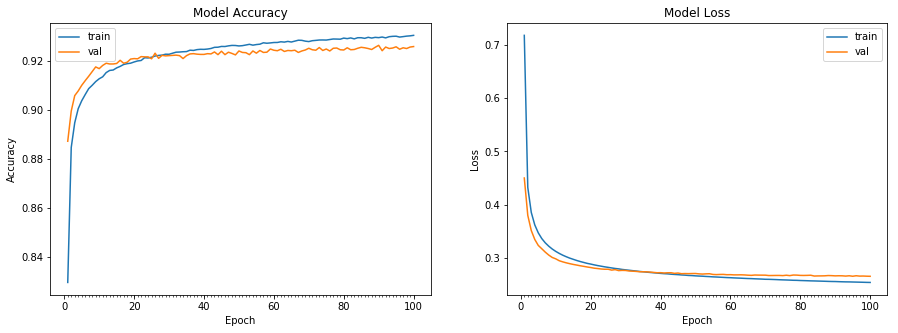

In [20]:
# list all data in history
print(history.history.keys())
plot_model_history(history)